<a href="https://colab.research.google.com/github/justdelly/My-IE423-Tasks/blob/main/notebooks/n5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

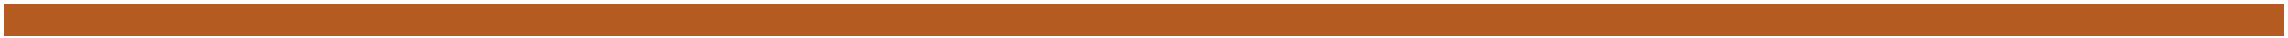

# Image Classification

  Fashion-MNIST Dataset

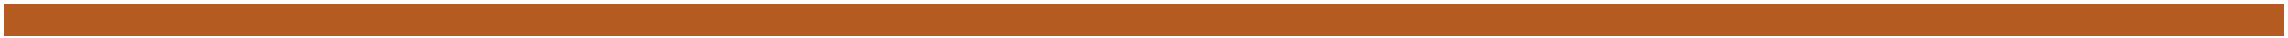

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.metrics import classification_report

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Since the dataset is already split into train and test we directly create variables.

In [3]:
fashion_train = pd.read_csv('/content/drive/MyDrive/Datasets/Fashion-MNIST-Dataset/mnist_fashion_train.csv')
fashion_test = pd.read_csv('/content/drive/MyDrive/Datasets/Fashion-MNIST-Dataset/mnist_fashion_test.csv')
fashion_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [4]:
# Define target and features

X_train = scale(fashion_train.drop(['label'], axis=1))
y_train = fashion_train['label'].ravel()
X_test = scale(fashion_test.drop(['label'], axis=1))
y_test = fashion_test['label'].ravel()



## Analyze Data


Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

Handwriting 				 Label
AxesImage(size=(28, 28)) 		 7


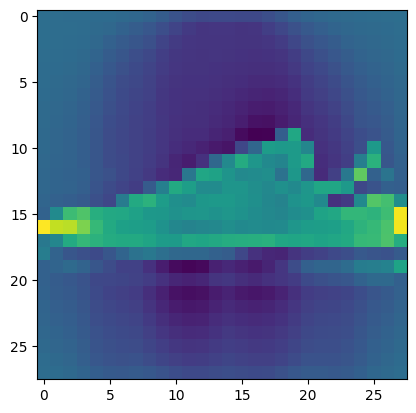

In [8]:
# Display first image
print('Handwriting', '\t\t\t\t', 'Label')
print(plt.imshow(X_train[6].reshape((28,28))), '\t\t', y_train[6])

Handwriting 				 Label
AxesImage(size=(28, 28)) 		 0


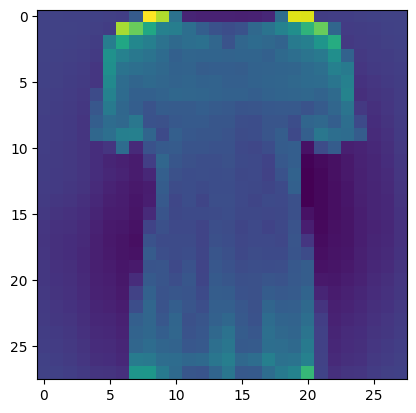

In [9]:
print('Handwriting', '\t\t\t\t', 'Label')
print(plt.imshow(X_train[10].reshape((28,28))), '\t\t', y_train[10])

It seems that we have not any problem with the dataset. It reads correct

In [11]:
# Assuming 'target_array' is your NumPy array
unique_digits, counts = np.unique(y_train, return_counts=True)

# Print the unique digits and their counts
for digit, count in zip(unique_digits, counts):
    print(f"Digit: {digit}, Count: {count}")

Digit: 0, Count: 6000
Digit: 1, Count: 6000
Digit: 2, Count: 6000
Digit: 3, Count: 6000
Digit: 4, Count: 6000
Digit: 5, Count: 6000
Digit: 6, Count: 6000
Digit: 7, Count: 6000
Digit: 8, Count: 6000
Digit: 9, Count: 6000


Data is balanced in an artificial way. There is no need for re-balancing on dataset.

## Predict Digit from Handwriting
Since **SVM** is a tool we already know, let's start with that.

In [12]:
%%time

# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC

mdlSvmDgt = SVC()
mdlSvmDgt.fit(X_train, y_train)
y_test_pred = mdlSvmDgt.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

CPU times: user 11min 44s, sys: 1.4 s, total: 11min 45s
Wall time: 11min 54s


SVM is quite successful avg score is 88%

### Neural Network

 Neural Networks mimic the neurons in the brain in that input values are taken and transformed collectively to generate the output.  



Neural Network libraries are efficient in solving for these weights and biases in large matrices... but they are not very explainable unless you define the layers in a meaningful manner.

<< WHITEBOARD

In [6]:
%%time

# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mdlNncDgt = MLPClassifier()
mdlNncDgt.fit(X_train, y_train)
y_test_pred = mdlNncDgt.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.84      0.81      1000
           3       0.87      0.88      0.88      1000
           4       0.85      0.79      0.81      1000
           5       0.96      0.95      0.95      1000
           6       0.72      0.70      0.71      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.95      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

CPU times: user 7min 26s, sys: 3min 27s, total: 10min 54s
Wall time: 6min 50s


Neural Network is significantly faster than SVM but models are equivalent on this dataset.

utexas_ds_orie_divider_gray.png

### Deep Neural Network

Adding additional hidden layers in between the input and output layers could improve the solution.  Such models are known as **Deep Neural Network** models.

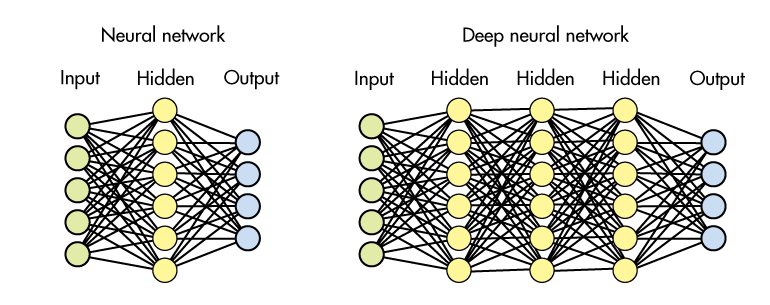

In [14]:
%%time

# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
mdlDncDgt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncDgt.fit(X_train, y_train)
y_test_pred = mdlDncDgt.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.78      0.79      1000
           3       0.87      0.90      0.89      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.69      0.70      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

CPU times: user 6min 4s, sys: 2min 40s, total: 8min 45s
Wall time: 5min 18s


Again there is no difference in model score.

### Cross Validation

In addition to the typical train/test split, it helps to run multiple experiments in which the train/test data is different.  Suppose the data is being split train-80%/test-20%, then there are 5 different experiments that can be run in which each data point is part of the test set at least once.  So, let's break up the data into multiple train/test splits and **cross-validate** across all to make sure the model works well.

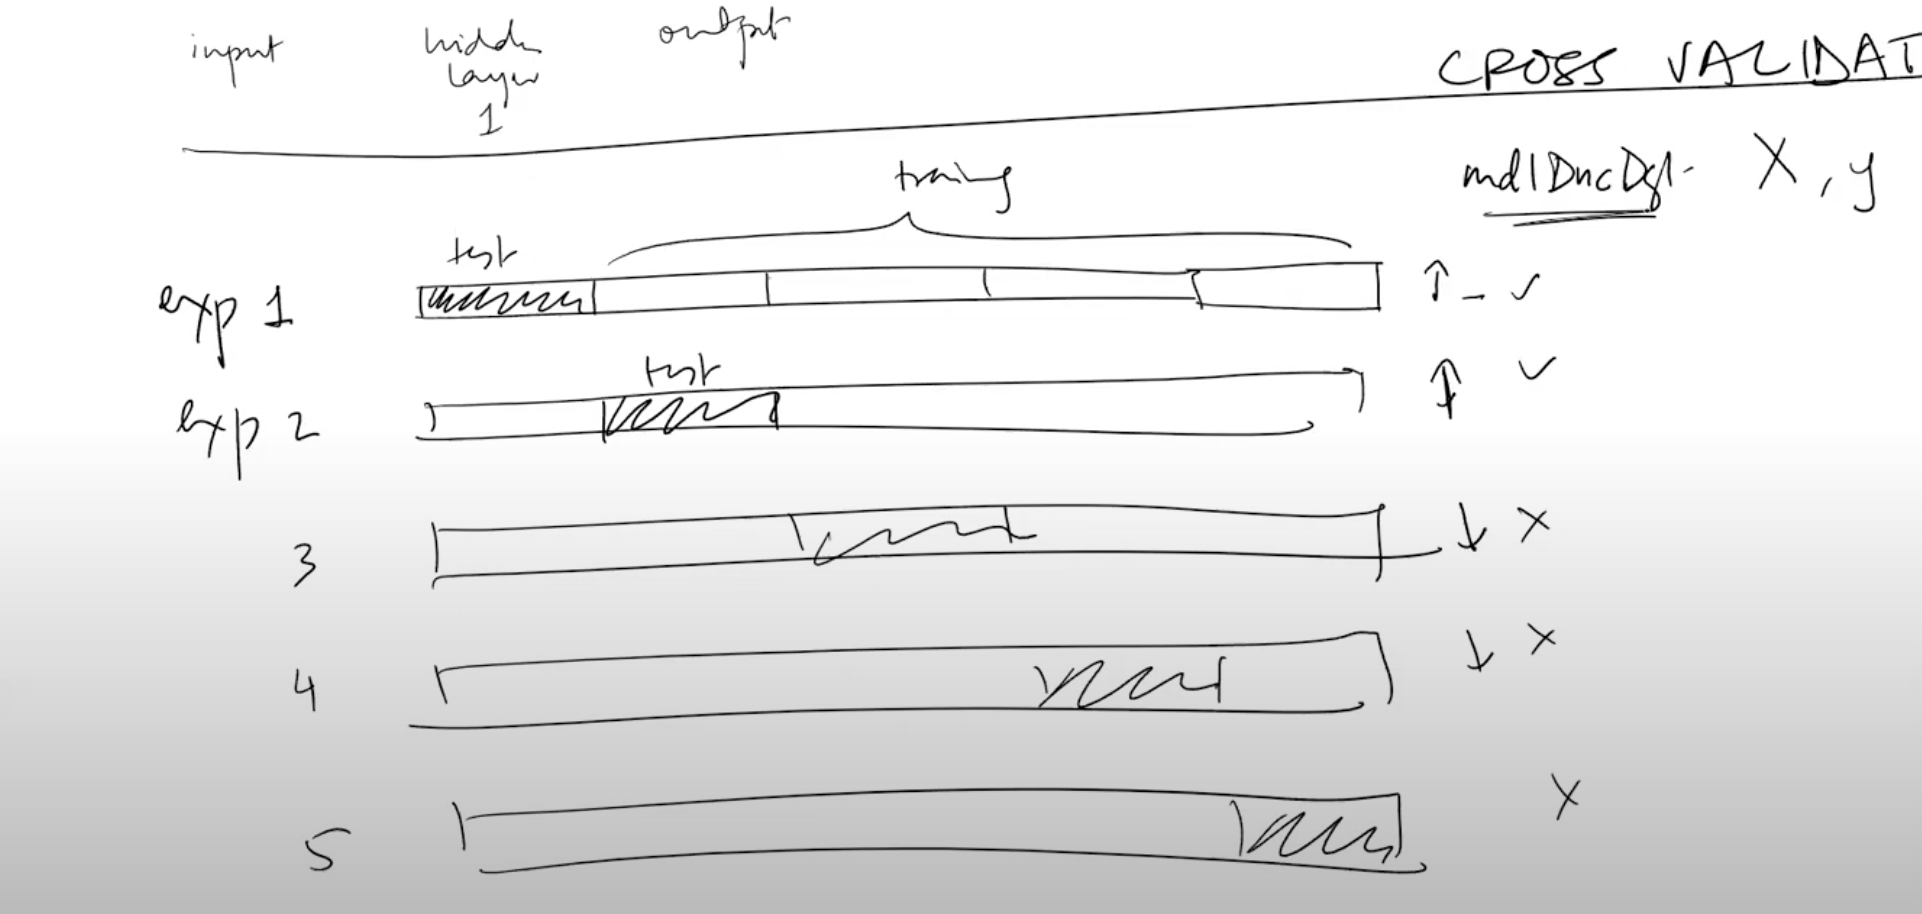

In [7]:
# Cross-validate Neural Network model across 3 different experiments
from sklearn.model_selection import cross_val_score
cross_val_score(mdlNncDgt, X_train, y_train, cv=3)

array([0.87935, 0.88645, 0.8853 ])

It is also 88%

utexas_ds_orie_divider_gray.png

Due to the dataset models couldn't make a difference probably. But all of them made acceptable scores.